# Animated Plots in the Jupyter Notebook

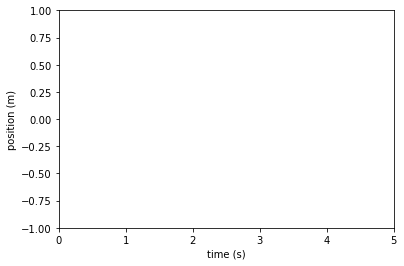

In [1]:
#
"""
This short code snippet utilizes the new animation package in matplotlib 1.1.0
It's the shortest snippet that I know of that can produce an animate plot in
python. I'm hoping that the animation package can be improved so that one could
more simply animate things. What do you think?
"""
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML

%matplotlib inline

def simData():
# this function is called as the argument for
# the simPoints function. This function contains
# (or defines) and iterator---a device that computes
# a value, passes it back to the main program, and then
# returns to exactly where it left off in the function.
    t_max = 10.0
    dt = 0.05
    x = 0.0
    t = 0.0
    while t < t_max:
        x = np.sin(np.pi*t)
        t = t + dt
        yield x, t

def simPoints(simData):
    x, t = simData[0], simData[1]
    time_text.set_text(time_template%(t))
    line.set_data(t, x)
    return line, time_text


##
##   set up figure for plotting:
##
fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot([], [], 'bo', ms=10) # I'm still not clear on this stucture...
ax.set_ylim(-1, 1)
ax.set_xlim(0, 5)
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
##

In [3]:
time_template = 'Time = %.1f s'    # prints running simulation time
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
## Now call the animation package:
anim = animation.FuncAnimation(fig, simPoints, simData, blit=False, interval=50,
   repeat=False)
HTML(anim.to_html5_video())